## NBA Combine and Careers: How Athleticism Translates into Box Score Performance
#### *STATS 131 | Fall 2019 | Group 7: Brielle Balswick, Julia Sung, Faith Tsang, Jeremy Tran*

## 1. Introduction and Background

Athleticism has long been a heavily desired trait, if not outright requirement, for the vast majority of sports hopefuls. From badminton to rugby, "players" have become synonymous with "athletes," complete with training regimens, health checkups, diet adjustments, and near-constant gym photos. At the same time, sports history is littered with examples of surprising successes from the less-athletic (Wayne Gretzky, Steve Nash, and the like), and conversely, the drafting process for almost every sport includes numerous busts who demonstrated excellent jumping or running ability but simply failed to play the game well. Basketball stands as an exemplar of this principle, and every year, countless draft experts and scouts dedicate sizable swaths of time to predicting which players will maximize their physical gifts, or else compensate with some other superb skill. In this notebook, we will seek to answer that underlying, motivating question: **how does initial athleticism translate into on-court production?**

We will examine NBA data, acquired from two sources: a [Basketball-Reference query](http://bkref.com/tiny/pYeHd) and NBA combine data scraped from [DraftExpress](https://data.world/achou/nba-draft-combine-measurements/workspace/file?filename=nba_draft_combine_all_years.csv). 
* The former uses statistics from Sportradar, the [official stats partner of the NBA](https://sportradar.us/2016/09/nba-announces-multiyear-partnership-with-sportradar-and-second-spectrum/). The resulting data is comprised of NBA players' career averages, along with Basketball-Reference's [own statistic](https://www.basketball-reference.com/about/ws.html): WS, or Win Shares, along with its normalized equivalent, WS/48. 
* The latter data was scraped from DraftExpress, which unfortunately no longer maintains their online databases, since the site owners [moved to ESPN](http://www.draftexpress.com/article/the-end-of-an-era-6070/). However, as far as we can tell, the data is still accurate when compared to NBA's official [statistics API](https://stats.nba.com/draft/combine/).

These datasets will need to be joined together by player name, which will be the first step of our journey below. The resulting dataset represents **players who participated in the NBA draft combine and were actually drafted by NBA teams in the years 2009-2017**.

## 2. Setup and Joining

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
player_avgs = pd.read_csv('player_avgs.csv')
nba_combine = pd.read_csv('nba_draft_combine_all_years.csv')

In [5]:
player_avgs.head()

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2014,NBA,2,51,NYK,Thanasis Antetokounmpo\antetth01,21.348,F,gr,NaN,2016.0,2020.0,3.0,4.0,2.7,1.0,0.3,0.0,0.0,0.667,0.800,0.000,NaN,0.1,0.304
1,2,2009,NBA,1,3,OKC,James Harden\hardeja01,19.308,G,us,Arizona State,2010.0,2020.0,771.0,34.1,24.4,5.2,6.2,1.5,0.5,0.442,0.507,0.363,0.859,122.5,0.223
2,3,2011,NBA,1,15,IND,Kawhi Leonard\leonaka01,19.364,F,us,San Diego State,2012.0,2020.0,473.0,30.8,17.8,6.3,2.4,1.8,0.7,0.494,0.537,0.383,0.848,66.9,0.220
3,4,2013,NBA,1,27,DEN,Rudy Gobert\goberru01,21.006,C,fr,NaN,2014.0,2020.0,413.0,28.8,11.1,10.6,1.3,0.7,2.2,0.628,0.629,0.000,0.631,53.6,0.216
4,5,2012,NBA,1,1,NOH,Anthony Davis\davisan02,19.114,F-C,us,Kentucky,2013.0,2020.0,472.0,34.6,23.8,10.5,2.1,1.4,2.4,0.516,0.533,0.311,0.797,73.2,0.215


In [6]:
nba_combine.head()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35


We'll rename the `Draft pick` column in `nba_combine` to `Pk`, in order to facilitate joining the two datasets later:

In [7]:
nba_combine.rename(columns = {'Draft pick': 'Pk'}, inplace = True)

Then, we need to clean the players' names in the `player_avgs` dataframe, so that the part after the slash is not included.

In [8]:
player_avgs.Player = [name.split('\\')[0] for name in player_avgs.Player]
player_avgs.Player[0:5]

0    Thanasis Antetokounmpo
1              James Harden
2             Kawhi Leonard
3               Rudy Gobert
4             Anthony Davis
Name: Player, dtype: object

Now, we can merge the two datasets using `pd.merge`. We'll join them based on both player name and which pick they were, since we have a case where two players had the exact same name (Marcus Thornton) but were drafted in different positions. There are no other duplicated names.

In [11]:
combine_careers_raw = pd.merge(nba_combine, player_avgs, on = ['Player', 'Pk'], how = 'inner')
# combine_careers_raw.to_csv('combine_careers.csv')
combine_careers_raw.head()

,Unnamed: 0,Player,Year_x,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year_y,Lg,Rd,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,NBA,1,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NBA,1,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,NBA,1,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,NBA,1,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,NBA,1,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038


In [12]:
# the duplicated player name is Marcus Thornton
combine_careers_raw.Player.value_counts().head()

Marcus Thornton     2
Daniel Orton        1
Shabazz Muhammad    1
Olivier Hanlan      1
Ray McCallum        1
Name: Player, dtype: int64

In [13]:
# they were drafted at different picks
# joining on both player name and pick position allows us to avoid cross-product joins
combine_careers_raw[combine_careers_raw.Player == 'Marcus Thornton'][['Player', 'Pk']]

,Player,Pk
30,Marcus Thornton,43.0
281,Marcus Thornton,45.0


## 3. Cleaning the Data

Let's look at the structure of our data. We see below that we have 368 rows and 44 columns, but we have quite a few missing values in several columns. There's also seems to be several redundant columns that could be removed (e.g., `Year_x` and `Year_y`).

In [14]:
combine_careers_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 43 columns):
Unnamed: 0                  366 non-null int64
Player                      366 non-null object
Year_x                      366 non-null int64
Pk                          366 non-null float64
Height (No Shoes)           366 non-null float64
Height (With Shoes)         366 non-null float64
Wingspan                    366 non-null float64
Standing reach              366 non-null float64
Vertical (Max)              317 non-null float64
Vertical (Max Reach)        317 non-null float64
Vertical (No Step)          317 non-null float64
Vertical (No Step Reach)    317 non-null float64
Weight                      365 non-null float64
Body Fat                    365 non-null float64
Hand (Length)               328 non-null float64
Hand (Width)                326 non-null float64
Bench                       209 non-null float64
Agility                     312 non-null float64
Sprint            

#### A. Removing Unnecessary Columns

We immediately notice that the first column is unnecessary, so we can remove it.

In [15]:
combine_careers = combine_careers_raw.copy()
combine_careers.drop('Unnamed: 0', 1, inplace = True)

We also notice that we have two year columns. Are there any discrepancies between the two? The answer is yes:

In [16]:
year_diff = combine_careers[['Year_x', 'Year_y']][combine_careers.Year_x != combine_careers.Year_y]
combine_careers.iloc[year_diff.index][['Player', 'Year_x', 'Year_y']]

,Player,Year_x,Year_y
15,Damion James,2009,2010
33,Gani Lawal,2009,2010
36,Luke Harangody,2009,2010
293,Justin Jackson,2016,2017
300,Caleb Swanigan,2016,2017
304,Josh Hart,2016,2017
326,Jaron Blossomgame,2016,2017


A quick look at these players' NBA combine results shows that `Year_y`  is the correct column (for both [2010](https://www.nbadraft.net/2010-nba-draft-combine-official-measurements/) and [2017](https://www.nbadraft.net/2017-nba-draft-combine-measurements/) draftees). A brief check against the [official NBA Combine data](https://stats.nba.com/draft/combine-anthro/?SeasonYear=2016-17) shows that player statistics are still accurate, with some minor rounding differences. We'll go ahead and delete the `Year_x` column, and rename `Year_y` to `Year`.

In [17]:
combine_careers.drop('Year_x', 1, inplace = True)
combine_careers.rename(columns = {'Year_y': 'Year'}, inplace = True)

Other columns we can delete: `Lg` and `Rd` (which stand for league and draft round, respectively). These are redundant because all players are in the NBA league, and because [draft round is redundant information if we know the draft pick](https://www.nba.com/nba-draft-lottery-explainer) (picks 1-30 are in round 1, and picks 31-60 are in round 2).

In [18]:
# all players are in the NBA
combine_careers.Lg.value_counts()

NBA    366
Name: Lg, dtype: int64

In [19]:
# all picks 1-30 are in Round 1, and all picks 31-60 are in Round 2
combine_careers.groupby(['Rd', 'Pk']).Player.count().unstack()

Pk,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,58.0,59.0,60.0
Rd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,6.0,6.0,6.0,5.0,7.0,5.0,8.0,6.0,7.0,7.0,7.0,8.0,9.0,6.0,5.0,7.0,9.0,8.0,6.0,7.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,9.0,8.0,6.0,8.0,9.0,7.0,5.0,8.0,8.0,6.0,6.0,8.0,4.0,7.0,6.0,5.0,7.0,4.0,7.0,5.0,3.0,3.0,5.0,4.0,5.0,5.0,2.0


In [20]:
combine_careers.drop(['Lg', 'Rd'], 1, inplace = True)

Let's take a final look at our (relatively clean) dataset. We'll deal with all the missing values next.

In [21]:
combine_careers.shape

(366, 39)

In [22]:
combine_careers.head()

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,Blake Griffin,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171
1,Terrence Williams,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004
2,Gerald Henderson,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063
3,Tyler Hansbrough,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134
4,Earl Clark,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038


#### B. Removing Players Who Never Played

We can easily see that there are a number of players who participated in the draft combine, were drafted, but never played a single game.

In [23]:
combine_careers[combine_careers.G.isnull()].Player

34       Jack McClinton
62        Terrico White
70          Tiny Gallon
71        Ryan Richards
76     Stanley Robinson
115         Jon Diebler
163       Marcus Denmon
202      Colton Iverson
204      Deshaun Thomas
228     DeAndre Daniels
241          Alec Brown
246       Xavier Thames
279      Olivier Hanlan
281     Marcus Thornton
284         Aaron White
285        Tyler Harvey
287         J.P. Tokoto
325      Isaiah Cousins
Name: Player, dtype: object

Let's go ahead and delete these rows, since they won't help us learn about how athleticism affects career.

In [24]:
combine_careers = combine_careers[combine_careers.G.notnull()]
# no more players who didn't play any games
len(combine_careers[combine_careers.G.isnull()].Player)

0

In [25]:
combine_careers.shape

(348, 39)

#### C. Dealing with Players Who Have Missing Measurements

In [26]:
combine_careers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 365
Data columns (total 39 columns):
Player                      348 non-null object
Pk                          348 non-null float64
Height (No Shoes)           348 non-null float64
Height (With Shoes)         348 non-null float64
Wingspan                    348 non-null float64
Standing reach              348 non-null float64
Vertical (Max)              300 non-null float64
Vertical (Max Reach)        300 non-null float64
Vertical (No Step)          301 non-null float64
Vertical (No Step Reach)    301 non-null float64
Weight                      347 non-null float64
Body Fat                    347 non-null float64
Hand (Length)               311 non-null float64
Hand (Width)                309 non-null float64
Bench                       195 non-null float64
Agility                     295 non-null float64
Sprint                      298 non-null float64
Rk                          348 non-null int64
Year            

In [27]:
len(combine_careers[combine_careers['Hand (Length)'].isnull()])

37

In [28]:
cc = combine_careers.set_index('Player').sort_index()

## 4. Exploratory Data Analysis

#### A. Standardizing Variables

In [29]:
cc48 = cc.loc[:,'PPG':'BPG'].apply(lambda x: 48 *(x / cc.MPG))
cc48.columns=['PP48', 'RP48', 'AP48', 'SP48', 'BP48']
cc = pd.concat([cc, cc48], axis = 1, sort = True)
cc.head()

,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Price,52.0,72.50,74.00,75.75,97.0,31.0,128.0,26.0,123.0,193.0,12.4,NaN,NaN,11.0,10.99,3.22,272,2009,IND,22.267,G,us,UConn,2010.0,2015.0,261.0,15.1,5.8,1.4,2.2,0.5,0.0,0.380,0.439,0.316,0.742,4.7,0.058,18.437086,4.450331,6.993377,1.589404,0.000000
Aaron Gordon,4.0,79.50,80.75,83.75,105.0,39.0,144.0,32.5,137.5,220.0,5.1,8.75,10.50,NaN,10.81,3.27,153,2014,ORL,18.288,F,us,Arizona,2015.0,2020.0,347.0,27.9,12.4,6.2,2.2,0.8,0.6,0.450,0.511,0.321,0.705,18.5,0.092,21.333333,10.666667,3.784946,1.376344,1.032258
Adreian Payne,15.0,81.00,81.75,88.00,109.0,NaN,NaN,NaN,NaN,239.0,7.6,9.25,9.50,NaN,NaN,NaN,447,2014,ATL,23.133,F-C,us,Michigan State,2015.0,2018.0,107.0,13.1,4.0,2.9,0.6,0.4,0.3,0.406,0.430,0.254,0.680,-0.6,-0.019,14.656489,10.625954,2.198473,1.465649,1.099237
Al-Farouq Aminu,8.0,79.25,80.50,87.25,108.5,33.5,142.0,27.0,135.5,216.0,8.2,9.50,9.50,13.0,11.29,3.30,214,2010,LAC,19.281,F,us,Wake Forest,2011.0,2020.0,676.0,25.2,7.7,6.1,1.2,1.0,0.6,0.422,0.468,0.338,0.745,27.5,0.078,14.666667,11.619048,2.285714,1.904762,1.142857
Alec Burks,12.0,77.00,78.00,82.00,103.5,36.0,139.5,29.0,132.5,193.0,5.1,9.00,8.25,5.0,10.96,3.17,246,2011,UTA,19.343,G,us,Colorado,2012.0,2020.0,432.0,21.1,9.5,3.0,1.7,0.6,0.2,0.423,0.444,0.357,0.771,13.0,0.068,21.611374,6.824645,3.867299,1.364929,0.454976


C:\Users\Faith\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Faith\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


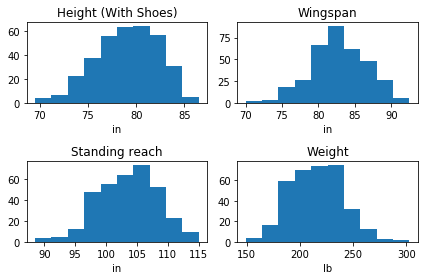

In [30]:
physicals = ['Height (With Shoes)', 'Wingspan', 'Standing reach', 'Weight']
athletics = ['Vertical (Max)', 'Bench', 'Agility', 'Sprint']
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.hist(physicals[i - 1], data = cc)
    plt.title(physicals[i - 1])
    if i == 4:
        plt.xlabel('lb')
    else:
        plt.xlabel('in')
plt.tight_layout()
plt.show()

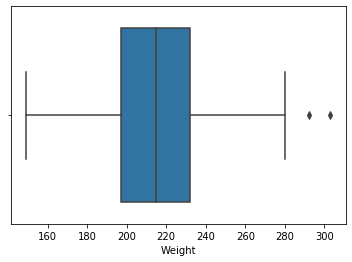

In [31]:
sns.boxplot('Weight', data = cc)
plt.show()

In [32]:
cc[cc.College.isnull()]

,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dante Exum,5.0,76.50,78.00,81.50,103.0,34.5,137.5,31.5,134.5,196.0,6.4,8.50,9.50,NaN,10.75,3.19,340,2014,UTA,18.353,G,au,NaN,2015.0,2019.0,204.0,19.3,5.9,1.8,2.3,0.4,0.2,0.400,0.477,0.304,0.770,2.7,0.033,14.673575,4.476684,5.720207,0.994819,0.497409
Enes Kanter,3.0,81.75,83.25,85.50,109.5,32.5,142.0,26.0,135.5,259.0,5.9,9.50,10.75,14.0,11.30,3.26,43,2011,UTA,19.038,C,ch,NaN,2012.0,2020.0,584.0,22.2,11.9,7.6,0.8,0.4,0.4,0.541,0.548,0.292,0.778,39.7,0.147,25.729730,16.432432,1.729730,0.864865,0.864865
Jeremy Tyler,39.0,81.00,82.50,89.00,110.5,33.5,144.0,28.0,138.5,262.0,13.4,9.25,9.00,10.0,11.26,3.29,383,2011,CHA,20.007,C,us,NaN,2012.0,2014.0,104.0,9.9,3.6,2.6,0.2,0.2,0.4,0.450,0.451,0.000,0.557,0.3,0.014,17.454545,12.606061,0.969697,0.969697,1.939394
Omri Casspi,23.0,79.75,81.25,81.25,106.5,32.5,139.0,25.5,132.0,211.0,8.6,NaN,NaN,2.0,11.15,3.28,213,2009,SAC,21.008,F,il,NaN,2010.0,2019.0,588.0,20.3,7.9,4.0,1.1,0.6,0.2,0.454,0.502,0.368,0.678,19.6,0.078,18.679803,9.458128,2.600985,1.418719,0.472906
Rodrigue Beaubois,25.0,73.25,74.25,81.75,100.0,39.0,139.0,29.5,129.5,182.0,7.9,NaN,NaN,3.0,10.49,3.15,206,2009,OKC,21.127,G,gp,NaN,2010.0,2013.0,182.0,15.9,7.1,1.9,2.1,0.7,0.3,0.439,0.500,0.325,0.810,4.8,0.079,21.433962,5.735849,6.339623,2.113208,0.905660
Rudy Gobert,27.0,84.50,86.00,92.50,115.0,29.0,144.0,25.0,140.0,238.0,4.4,9.75,10.00,7.0,12.85,3.57,4,2013,DEN,21.006,C,fr,NaN,2014.0,2020.0,413.0,28.8,11.1,10.6,1.3,0.7,2.2,0.628,0.629,0.000,0.631,53.6,0.216,18.500000,17.666667,2.166667,1.166667,3.666667
Terrance Ferguson,21.0,77.50,79.00,80.75,103.0,38.0,141.0,28.5,131.5,184.0,5.8,8.50,10.00,NaN,11.16,3.32,235,2017,OKC,19.041,G-F,us,NaN,2018.0,2020.0,141.0,20.1,5.1,1.4,0.7,0.5,0.2,0.424,0.571,0.355,0.762,4.2,0.072,12.179104,3.343284,1.671642,1.194030,0.477612
Thanasis Antetokounmpo,51.0,77.25,78.25,84.00,104.5,39.5,144.0,31.5,136.0,205.0,6.1,9.00,9.75,NaN,11.39,3.18,1,2014,NYK,21.348,F,gr,NaN,2016.0,2020.0,3.0,4.0,2.7,1.0,0.3,0.0,0.0,0.667,0.800,0.000,NaN,0.1,0.304,32.400000,12.000000,3.600000,0.000000,0.000000
Thon Maker,10.0,83.75,84.75,87.00,110.5,36.5,147.0,32.0,142.5,216.0,6.1,8.75,9.50,NaN,11.15,3.33,210,2016,MIL,19.123,F-C,ss,NaN,2017.0,2020.0,202.0,14.2,4.6,2.8,0.6,0.4,0.7,0.418,0.490,0.323,0.674,4.8,0.079,15.549296,9.464789,2.028169,1.352113,2.366197


In [33]:
cc[cc.MPG > 10].groupby(['Year', 'Pos'])['Vertical (Max)'].mean().unstack()
cc[(cc.Pos == 'C') & (cc.Year == 2015)]

,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dakari Johnson,48.0,83.0,83.75,86.0,112.0,25.0,137.0,22.5,134.5,265.0,14.9,9.25,10.5,4.0,11.5,3.62,15,2015,OKC,19.281,C,us,Kentucky,2018.0,2018.0,31.0,5.2,1.8,1.1,0.3,0.2,0.3,0.564,0.564,NaN,0.55,0.6,0.178,16.615385,10.153846,2.769231,1.846154,2.769231


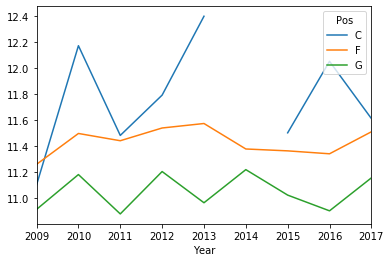

In [34]:
cc.groupby(['Year', 'Pos'])['Agility'].mean().unstack()[['C', 'F', 'G']].plot()
plt.show()

In [35]:
cc[cc.MPG > 10].groupby(['Pos', 'Year'])['Vertical (Max)'].mean()

Pos  Year
C    2009    32.500000
     2010    31.500000
     2011    32.500000
     2012    33.500000
     2013    30.333333
     2017    33.000000
C-F  2009    35.000000
     2010    29.700000
     2012    34.333333
     2013    34.333333
     2015          NaN
     2016          NaN
     2017    37.000000
F    2009    33.916667
     2010    34.000000
     2011    33.590909
     2012    34.678571
     2013    36.666667
     2014    37.600000
     2015    35.100000
     2016    37.375000
     2017    37.071429
F-C  2009    33.000000
     2010    35.500000
     2011    35.000000
     2012    34.166667
     2013    33.500000
     2014    35.333333
     2015    36.750000
     2016    35.666667
     2017    32.500000
F-G  2010    35.750000
     2011    39.000000
     2012    34.250000
     2013    37.000000
     2014          NaN
     2015    34.500000
     2016          NaN
     2017    37.500000
G    2009    35.468750
     2010    36.400000
     2011    36.384615
     2012    36.888889
 

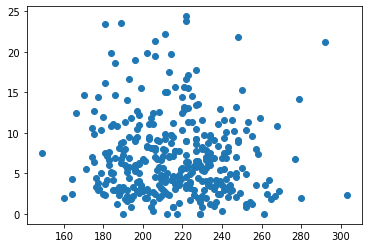

In [36]:
plt.scatter('Weight', 'PPG', data = cc)
plt.show()

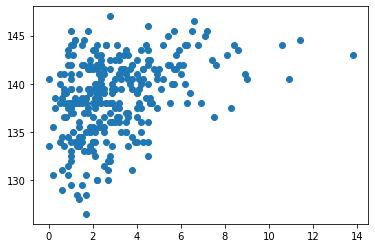

In [37]:
plt.scatter('RPG', 'Vertical (Max Reach)', data = cc)
plt.show()

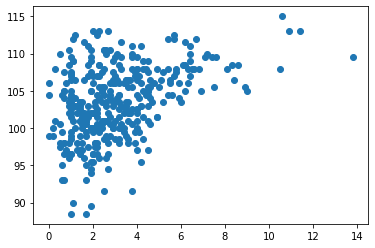

In [38]:
plt.scatter('RPG', 'Standing reach', data = cc)
plt.show()

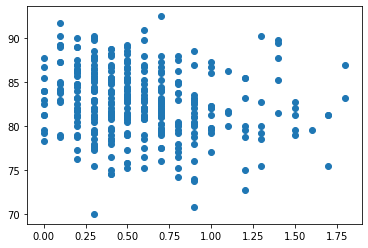

In [39]:
plt.scatter('SPG', 'Wingspan', data = cc)
plt.show()

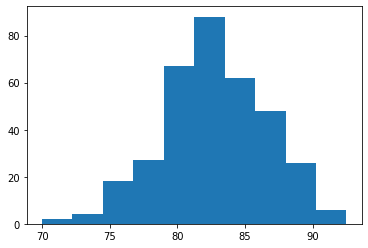

In [40]:
plt.hist('Wingspan', data = cc)
plt.show()

C:\Users\Faith\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Faith\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


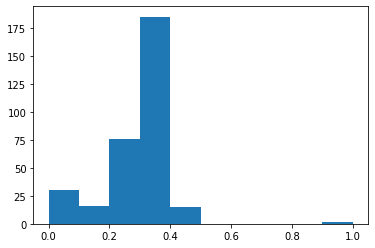

In [41]:
plt.hist('3P%', data = cc)
plt.show()

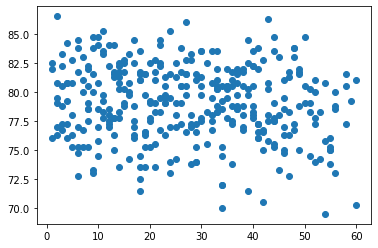

In [42]:
plt.scatter('Pk', 'Height (With Shoes)', data = cc)
plt.show()

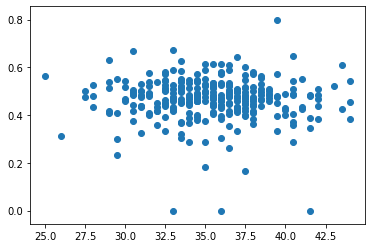

In [43]:
plt.scatter("Vertical (Max)", "2P%",data = cc)
plt.show()

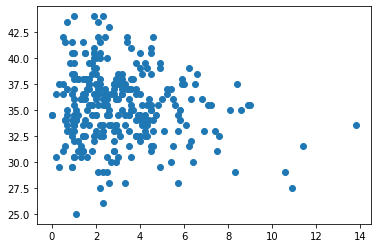

In [44]:
plt.scatter("RPG","Vertical (Max)", data = cc)
plt.show()

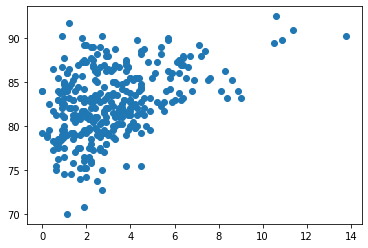

In [45]:
plt.scatter("RPG", "Wingspan", data = cc)
plt.show()

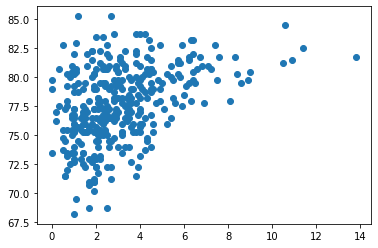

In [46]:
plt.scatter("RPG","Height (No Shoes)", data = cc)
plt.show()

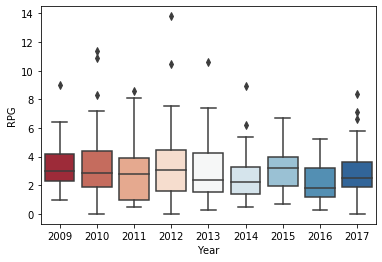

In [47]:
#plt.figure(figsize = (10,8))
with sns.color_palette("RdBu", 9):
    sns.boxplot("Year","RPG", data = cc)
plt.show()

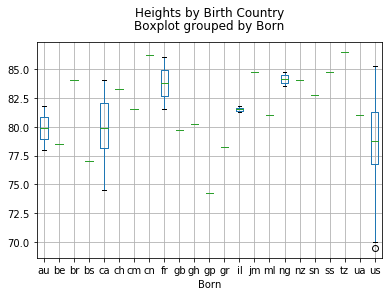

In [48]:
cc.boxplot('Height (With Shoes)', by = 'Born')
plt.title('Heights by Birth Country', y=1.09)
plt.show()

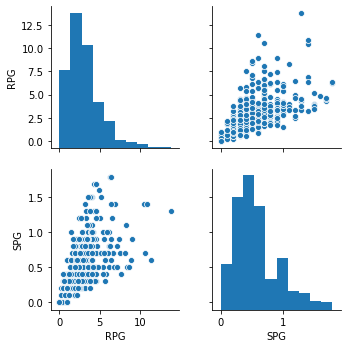

In [49]:
sns.pairplot(data = cc[['RPG', 'SPG']])
plt.show()

In [50]:
#import plotly.express as px
#px.scatter(cc, x = 'Standing reach', y = 'RPG')
#plt.show()

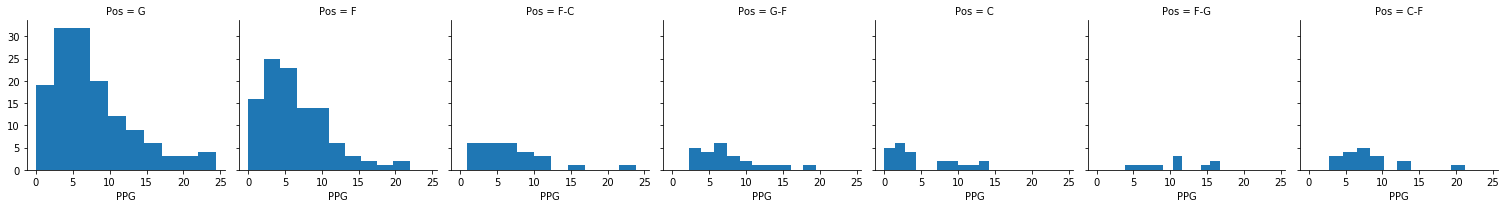

In [51]:
g = sns.FacetGrid(cc, col = 'Pos')
g.map(plt.hist, 'PPG')
plt.show()

Based on the small difference between C-F and F-C as well as the small difference between G-F and F-G, we decide to combine these positions together for a more concise understanding of the data.

In [52]:
pos_new = cc["Pos"]
cc["Pos_new"] = pos_new
print(cc["Pos"].value_counts())
cc.loc[cc["Pos_new"] == "F-C", 'Pos_new'] = "C-F"
cc.loc[cc["Pos_new"] == "F-G", 'Pos_new'] = "G-F"
cc["Pos_new"].value_counts()
cc["Pos_new"].count()

G      140
F      106
F-C     27
G-F     24
C       23
C-F     18
F-G     10
Name: Pos, dtype: int64


348

First, we wanted to take a look at how both draft combine statistics and in-game statistics compare across players based on their rank when drafted. This rank goes from one to sixty. In order to gain more insight from our plots, we chose to split players not just by round 1 (picks 1-30) or round 2 (picks 31-60) of the draft, but into smaller groups. The top ten picks are the most valued in the NBA draft lottery, so I chose to split the draft into groups of ten.

In [53]:
pk_bins = [0,11,21,31,41,51,60]
pk_names = ["1-10","11-20","21-30","31-40","41-50","51-60"]
pk_range = pd.cut(cc['Pk'], pk_bins, labels = pk_names)
cc["pk_range"] = pk_range

We start with taking a look at the physical statistics recorded at the draft combine.

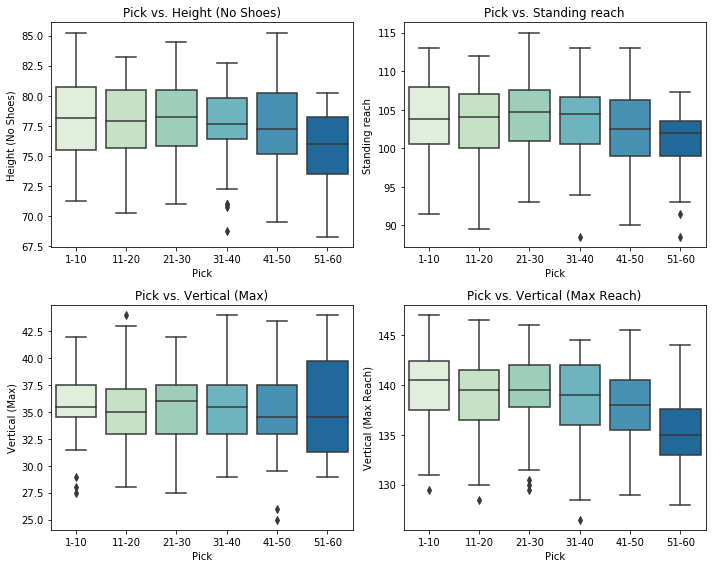

In [54]:
plt.figure(figsize = (10,8))
with sns.color_palette("GnBu",n_colors=6):
    plt.subplot(2,2,1)
    sns.boxplot("pk_range","Height (No Shoes)", data = cc)
    plt.title("Pick vs. Height (No Shoes)")
    plt.xlabel("Pick")
    
    plt.subplot(2,2,2)
    sns.boxplot("pk_range","Standing reach", data = cc)
    plt.title("Pick vs. Standing reach")
    plt.xlabel("Pick")
    
    plt.subplot(2,2,3)
    sns.boxplot("pk_range","Vertical (Max)", data = cc)
    plt.title("Pick vs. Vertical (Max)")
    plt.xlabel("Pick")
    
    plt.subplot(2,2,4)
    sns.boxplot("pk_range","Vertical (Max Reach)", data = cc)
    plt.title("Pick vs. Vertical (Max Reach)")
    plt.xlabel("Pick")
plt.tight_layout()
plt.show()

When we look at pick vs. height (no shoes), the last players drafted had the lowest median. However, the median height for these players is around 76, whereas the median height for the players picked first was around 78, so the difference is quite small. The plot of pick vs. standing reach shows that the standing reach of players drafted last is lower than the standing reach of players drafted first. The median standing reach of the players drafted 11-40 is slightly higher than the standing reach of players drafted 1-10. The next plot, Pick vs. Vertical (Max), reveals that the third quartile of players drafted 51-60 is higher than the 75th quartile of vertical (max) for players drafted 1-10. In the last plot, we see how vertical (max reach) of players drafted first is much higher than the vertical (max reach) of players drafted last, which might indicate that having a good vertical (max reach), which includes wingspan, is an important factor in basketball skill.

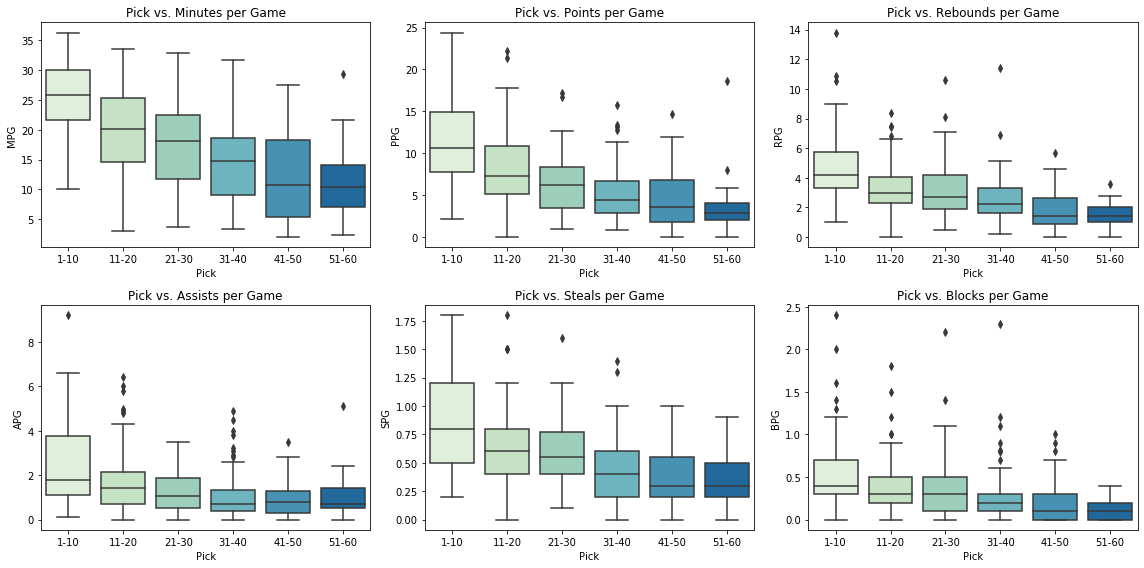

In [55]:
plt.figure(figsize = (16,8))
with sns.color_palette("GnBu",n_colors=6):
    plt.subplot(2,3,1)
    sns.boxplot("pk_range","MPG", data = cc)
    plt.title("Pick vs. Minutes per Game")
    plt.xlabel("Pick")
    
    plt.subplot(2,3,2)
    sns.boxplot("pk_range","PPG", data = cc)
    plt.title("Pick vs. Points per Game")
    plt.xlabel("Pick")
    
    plt.subplot(2,3,3)
    sns.boxplot("pk_range","RPG", data = cc)
    plt.title("Pick vs. Rebounds per Game")
    plt.xlabel("Pick")
    
    plt.subplot(2,3,4)
    sns.boxplot("pk_range","APG", data = cc)
    plt.title("Pick vs. Assists per Game")
    plt.xlabel("Pick")
    
    plt.subplot(2,3,5)
    sns.boxplot("pk_range","SPG", data = cc)
    plt.title("Pick vs. Steals per Game")
    plt.xlabel("Pick")
    
    plt.subplot(2,3,6)
    sns.boxplot("pk_range","BPG", data = cc)
    plt.title("Pick vs. Blocks per Game")
    plt.xlabel("Pick")
plt.tight_layout()
plt.show()

With these plots, we can see that as we would expect, points per game (PPG), rebounds per game (RPG), assists per game (APG), steals per game (SPG), and blocks per game (BPG) all increase as a player is picked earlier in the draft. Additionally, there are a decent number of outliers, with one interesting one being the outlier in the group of NBA players picked 51-60 who had a high PPG. Also, when we look at pick vs. blocks per game, we can see that while there seems to be a slight trend with players picked 1-10 performing better and players picked last performing the worst, there are many outliers. We choose to first identify the outlier that had a high PPG despite being picked as one of the last.

In [56]:
cc_pk51_60 = cc[cc["pk_range"] == "51-60"]
print(cc_pk51_60["PPG"].sort_values(ascending=False).head())
cc.loc["Isaiah Thomas":"Isaiah Thomas"]
# Isaiah Thomas ended up becoming an NBA All-Star even though he was not one of the first picks in the draft that year.

Player
Isaiah Thomas    18.6
E'Twaun Moore     8.0
A.J. Price        5.8
Kadeem Allen      5.6
Jordan McRae      5.0
Name: PPG, dtype: float64


,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48,Pos_new,pk_range
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Isaiah Thomas,60.0,68.75,70.25,73.75,91.5,40.0,131.5,31.5,123.0,186.0,6.7,8.25,9.0,13.0,10.49,3.14,38,2011,SAC,22.141,G,us,Washington,2012.0,2020.0,488.0,29.3,18.6,2.5,5.1,0.9,0.1,0.437,0.487,0.36,0.874,45.5,0.152,30.47099,4.095563,8.354949,1.474403,0.163823,G,51-60


Now we will perform the same analysis but with scaled in-game statistics. This is because statistics that are per game, such as points per game, do not account for the number of minutes that a player has played. A player that plays thirty minutes a game will likely have a higher PPG than a player that only played ten minutes simply because he has more chances to score. As such, scaling by using minutes per game (MPG) will give us a more accurate idea of how efficient a player is. We divide by 48 minutes because that is the typical length of a basketball game.

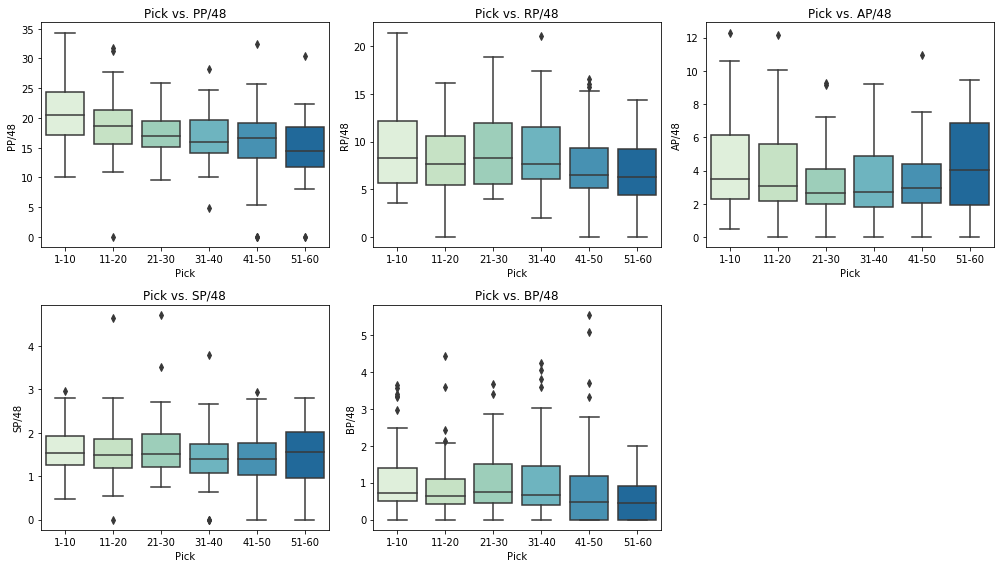

In [57]:
plt.figure(figsize = (14,8))
with sns.color_palette("GnBu",n_colors=6):
    plt.subplot(2,3,1)
    sns.boxplot("pk_range","PP48", data = cc)
    plt.xlabel("Pick")
    plt.ylabel("PP/48")
    plt.title("Pick vs. PP/48")

    plt.subplot(2,3,2)
    sns.boxplot("pk_range","RP48", data = cc)
    plt.xlabel("Pick")
    plt.ylabel("RP/48")
    plt.title("Pick vs. RP/48")
    
    plt.subplot(2,3,3)
    sns.boxplot("pk_range","AP48", data = cc)
    plt.xlabel("Pick")
    plt.ylabel("AP/48")
    plt.title("Pick vs. AP/48")
    
    plt.subplot(2,3,4)
    sns.boxplot("pk_range","SP48", data = cc)
    plt.xlabel("Pick")
    plt.ylabel("SP/48")
    plt.title("Pick vs. SP/48")
    
    plt.subplot(2,3,5)
    sns.boxplot("pk_range","BP48", data = cc)
    plt.xlabel("Pick")
    plt.ylabel("BP/48")
    plt.title("Pick vs. BP/48")
plt.tight_layout()
plt.show()

When we look at the same boxplots after scaling the in-game statistics, we can see that all the plots are much more level. Only Pick vs. PP/48 has little of the downward trend that we observed when looking at the non-scaled in-game statistics. Most interestly, the boxplots of steals and blocks are particurly more even. When looking specifically at BP/48, there are also a number of outliers that prove that picks who are not picked among the first can still perform well defensively. In other words, he boxplots show that many players who are picked later in the draft can still be quite efficient defensively. If a team picks a player who is good at defense, that player might not be as exceptionally good at defending as expected. Hence, teams ought not to just draft for defense alone, as it is possible to draft players who are good at defense as a later pick.

Next, we want to see if career length has a relationship with draft combine statistics or in-game statistics. For example, have the demographics of NBA players, like height or vertical (max reach), changed in any way over the years? Or has there been a change in in-game statistics over time?

In [58]:
career_length = cc['To'] - cc['From']
cc['Career Length'] = career_length
cc['Career Length'].describe()

count    348.000000
mean       3.936782
std        2.753363
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Career Length, dtype: float64

In [59]:
career_len_bins = [0,2,5,8,10]
career_len_names = ["0-2 years","2-5 years","5-8 years","8-10 years"]
career_len_range = pd.cut(cc['Career Length'], career_len_bins, labels = career_len_names)
cc["Career Length Group"] = career_len_range

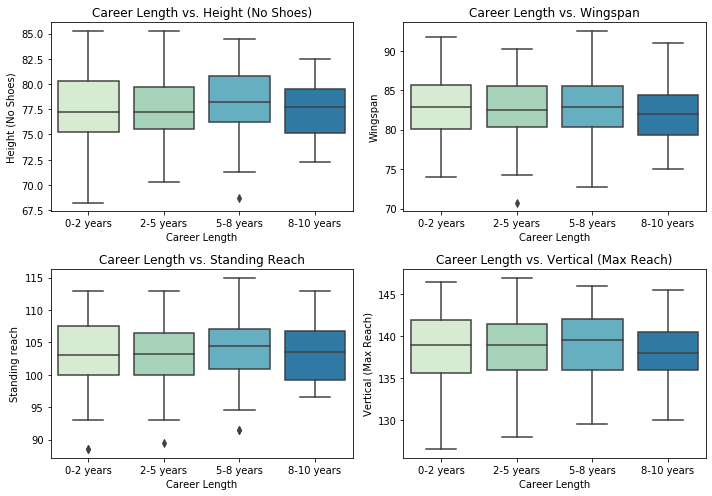

In [60]:
plt.figure(figsize = (10,7))
with sns.color_palette("GnBu",n_colors=4):
    plt.subplot(2,2,1)
    sns.boxplot("Career Length Group","Height (No Shoes)", data = cc)
    plt.xlabel("Career Length")
    plt.title("Career Length vs. Height (No Shoes)")
    
    plt.subplot(2,2,2)
    sns.boxplot("Career Length Group","Wingspan", data = cc)
    plt.xlabel("Career Length")
    plt.title("Career Length vs. Wingspan")
    
    plt.subplot(2,2,3)
    sns.boxplot("Career Length Group","Standing reach", data = cc)
    plt.xlabel("Career Length")
    plt.title("Career Length vs. Standing Reach")
    
    plt.subplot(2,2,4)
    sns.boxplot("Career Length Group","Vertical (Max Reach)", data = cc)
    plt.xlabel("Career Length")
    plt.title("Career Length vs. Vertical (Max Reach)")
plt.tight_layout()
plt.show()

Based on these boxplots, there has not been a significant shift in any demographics related to draft combine measurements.

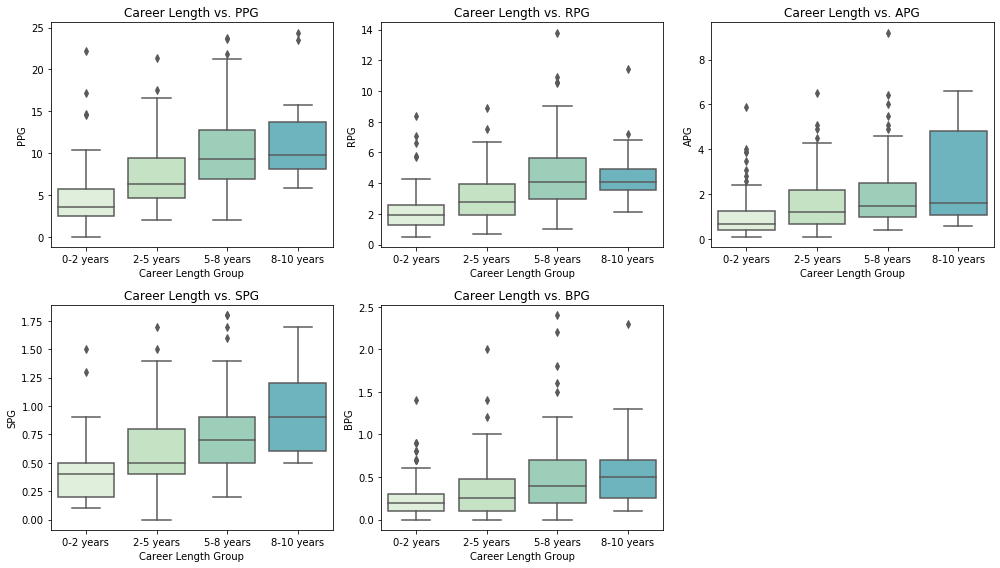

In [61]:
plt.figure(figsize = (14,8))
with sns.color_palette("GnBu",n_colors=6):
    plt.subplot(2,3,1)
    sns.boxplot("Career Length Group","PPG", data = cc)
    plt.title("Career Length vs. PPG")
    
    plt.subplot(2,3,2)
    sns.boxplot("Career Length Group","RPG", data = cc)
    plt.title("Career Length vs. RPG")
    
    plt.subplot(2,3,3)
    sns.boxplot("Career Length Group","APG", data = cc)
    plt.title("Career Length vs. APG")
    
    plt.subplot(2,3,4)
    sns.boxplot("Career Length Group","SPG", data = cc)
    plt.title("Career Length vs. SPG")
    
    plt.subplot(2,3,5)
    sns.boxplot("Career Length Group","BPG", data = cc)
    plt.title("Career Length vs. BPG")
plt.tight_layout()
plt.show()

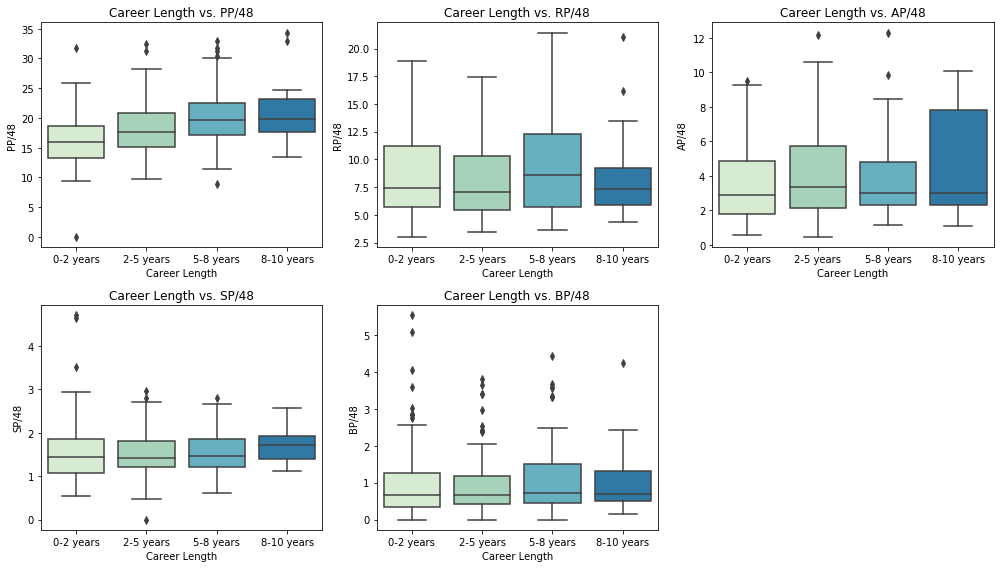

In [62]:
plt.figure(figsize = (14,8))
with sns.color_palette("GnBu",n_colors=4):
    plt.subplot(2,3,1)
    sns.boxplot("Career Length Group","PP48", data = cc)
    plt.xlabel("Career Length")
    plt.ylabel("PP/48")
    plt.title("Career Length vs. PP/48")
    
    plt.subplot(2,3,2)
    sns.boxplot("Career Length Group","RP48", data = cc)
    plt.xlabel("Career Length")
    plt.ylabel("RP/48")
    plt.title("Career Length vs. RP/48")
    
    plt.subplot(2,3,3)
    sns.boxplot("Career Length Group","AP48", data = cc)
    plt.xlabel("Career Length")
    plt.ylabel("AP/48")
    plt.title("Career Length vs. AP/48")
    
    plt.subplot(2,3,4)
    sns.boxplot("Career Length Group","SP48", data = cc)
    plt.xlabel("Career Length")
    plt.ylabel("SP/48")
    plt.title("Career Length vs. SP/48")
    
    plt.subplot(2,3,5)
    sns.boxplot("Career Length Group","BP48", data = cc)
    plt.xlabel("Career Length")
    plt.ylabel("BP/48")
    plt.title("Career Length vs. BP/48")
plt.tight_layout()
plt.show()

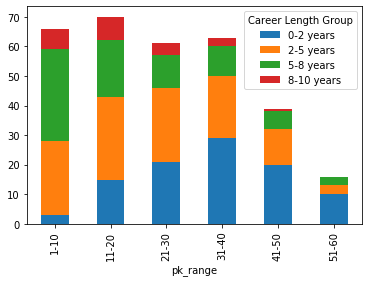

In [63]:
# Group by count of pick category across all career length groups: express with side-by-side barchart
# Or consider using stacked barchart
cc_pk_car_len = cc.groupby(['pk_range','Career Length Group'])['Career Length Group'].count()
cc_pk_car_len = cc_pk_car_len.unstack()
#cc_pk_car_len = cc_pk_car_len.value_counts(normalize=True)
cc_pk_car_len
cc_pk_car_len.plot(kind="bar",stacked=True)
plt.show()

In [64]:
# Look into year.y - difference in demographics over time?

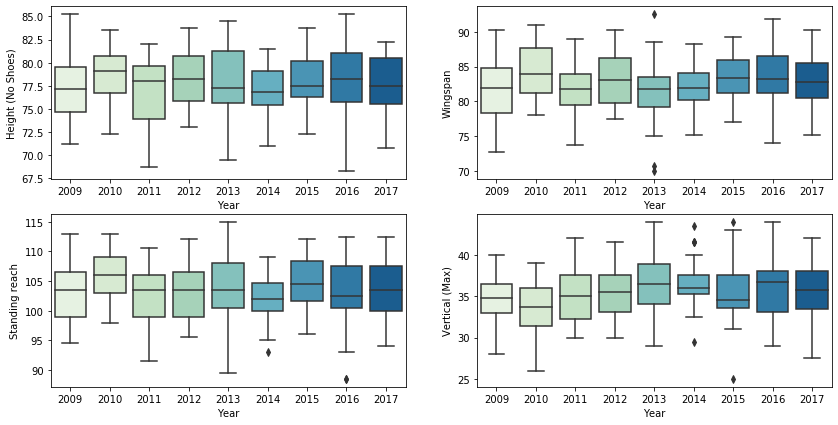

In [65]:
plt.figure(figsize = (14,7))
with sns.color_palette("GnBu",n_colors=9):
    plt.subplot(2,2,1)
    sns.boxplot("Year","Height (No Shoes)", data = cc)
    
    plt.subplot(2,2,2)
    sns.boxplot("Year","Wingspan", data = cc)
    
    plt.subplot(2,2,3)
    sns.boxplot("Year","Standing reach", data = cc)
    
    plt.subplot(2,2,4)
    sns.boxplot("Year","Vertical (Max)", data = cc)
plt.show()

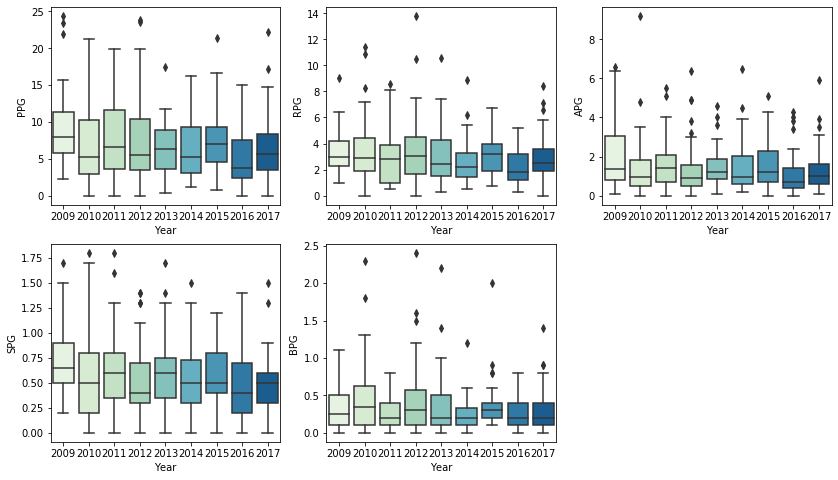

In [66]:
plt.figure(figsize = (14,8))
with sns.color_palette("GnBu",n_colors=9):
    plt.subplot(2,3,1)
    sns.boxplot("Year","PPG", data = cc)
    
    plt.subplot(2,3,2)
    sns.boxplot("Year","RPG", data = cc)
    
    plt.subplot(2,3,3)
    sns.boxplot("Year","APG", data = cc)
    
    plt.subplot(2,3,4)
    sns.boxplot("Year","SPG", data = cc)
    
    plt.subplot(2,3,5)
    sns.boxplot("Year","BPG", data = cc)
plt.show()

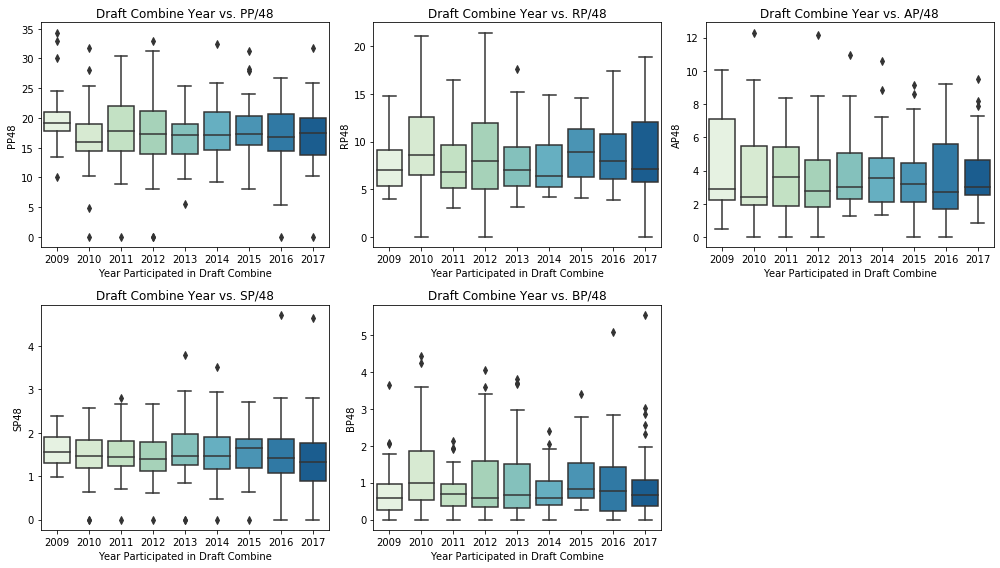

In [67]:
plt.figure(figsize = (14,8))
with sns.color_palette("GnBu",n_colors=9):
    plt.subplot(2,3,1)
    sns.boxplot("Year","PP48", data = cc)
    plt.xlabel("Year Participated in Draft Combine")
    plt.title("Draft Combine Year vs. PP/48")
    
    plt.subplot(2,3,2)
    sns.boxplot("Year","RP48", data = cc)
    plt.xlabel("Year Participated in Draft Combine")
    plt.title("Draft Combine Year vs. RP/48")
    
    plt.subplot(2,3,3)
    sns.boxplot("Year","AP48", data = cc)
    plt.xlabel("Year Participated in Draft Combine")
    plt.title("Draft Combine Year vs. AP/48")
    
    plt.subplot(2,3,4)
    sns.boxplot("Year","SP48", data = cc)
    plt.xlabel("Year Participated in Draft Combine")
    plt.title("Draft Combine Year vs. SP/48")
    
    plt.subplot(2,3,5)
    sns.boxplot("Year","BP48", data = cc)
    plt.xlabel("Year Participated in Draft Combine")
    plt.title("Draft Combine Year vs. BP/48")
plt.tight_layout()
plt.show()

Steals vs Wingspan

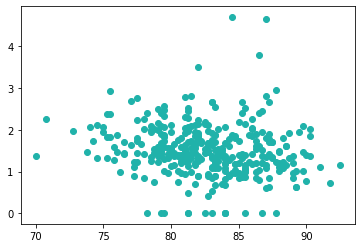

In [68]:
plt.scatter('Wingspan','SP48' ,data = cc, color="lightseagreen")
plt.show()

In [69]:
cc.groupby("Pos_new")['SP48',"Wingspan"].mean().sort_values("Wingspan")

,SP48,Wingspan
Pos_new,,
G,1.672009,79.282143
G-F,1.572059,82.139706
F,1.347384,84.272170
C-F,1.449209,86.711111
C,1.360493,88.304348


Intuitively, you might expect that wingspan is correlated with steals because you can reach the ball easier. However, we see that there is no strong correlation between wingspan and steals.

Just because a player has a wider wingspan(in this case the centers), does not necessarily mean that they have the most steals. Then let's think about what matters. Perhaps height and weight is a better determination of how well a player steals the ball.

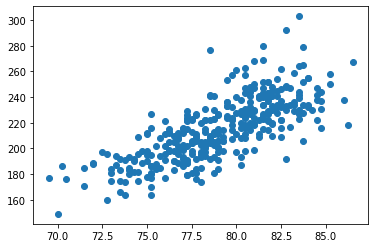

In [70]:
#Intuitively, a very strong correlation between height and weight.
plt.scatter('Height (With Shoes)',"Weight",data = cc)
plt.show()

In [71]:
#Are guards shorter or do they weight less? YES.
cc.groupby("Pos_new")['Height (With Shoes)',"Weight"].mean().sort_values("Height (With Shoes)")

,Height (With Shoes),Weight
Pos_new,,
G,75.892857,195.086331
G-F,78.845588,208.558824
F,80.676887,227.150943
C-F,82.522222,239.822222
C,83.760870,248.391304


So why would this matter? Possibly their agility/sprint is better. By looking at the pair plots,(3,3 and 4,4) we see that indeed, guards have the highest sprint.

C:\Users\Faith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Faith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


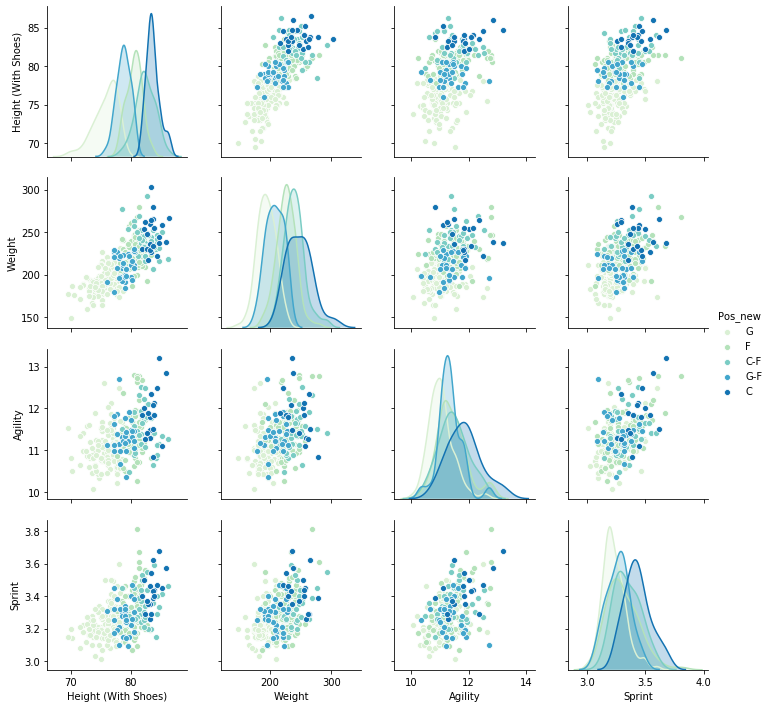

In [72]:
with sns.color_palette("GnBu",n_colors=5):
    sns.pairplot(cc, 
             vars = ['Height (With Shoes)', 'Weight', 'Agility', "Sprint"], 
             hue = 'Pos_new')
plt.show()

In [73]:
pos_agility=cc.groupby("Pos_new")['Agility'].mean().sort_values()
pos_agility

Pos_new
G      11.044590
G-F    11.351333
F      11.431333
C-F    11.482941
C      11.853684
Name: Agility, dtype: float64

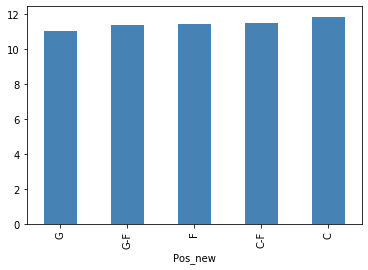

In [74]:
pos_agility.plot.bar(color="steelblue")
plt.show()

In [75]:
pos_sprint=cc.groupby("Pos_new")['Sprint'].mean().sort_values()
pos_sprint

Pos_new
G      3.234309
G-F    3.269333
F      3.313370
C-F    3.348235
C      3.434737
Name: Sprint, dtype: float64

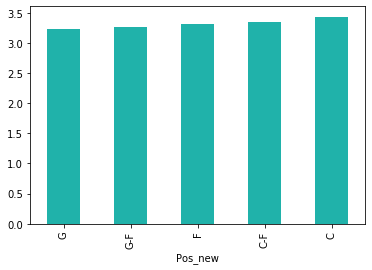

In [76]:
pos_sprint.plot.bar(color='lightseagreen')
plt.show()

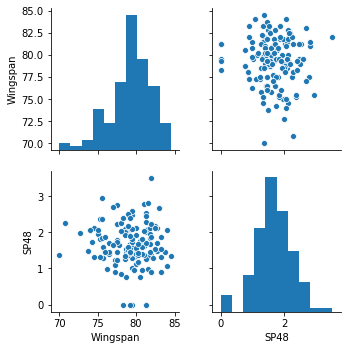

In [77]:
#Within guards, does wingspan affect SP48? If we hold the other factors constant.....
guards=cc[cc["Pos_new"]=="G"]
sns.pairplot(guards, vars=["Wingspan", "SP48"])
plt.show()

In [78]:
guards[["Sprint","Agility"]].std()

Sprint     0.099111
Agility    0.430293
dtype: float64

In [79]:
guards[["Height (No Shoes)","Weight"]].std()

Height (No Shoes)     2.010778
Weight               14.953300
dtype: float64

- drop that one more player with missing values
- vertical: use imputation based on median based on that position
- same for hand length and width
- or drop ones without the hand measurements
- compare two models this way
- same with sprint and agility
- ignore bench: throw it out - it is no longer measured at the draft combine

In [82]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, A.J. Price to Zhou Qi
Data columns (total 47 columns):
Pk                          347 non-null float64
Height (No Shoes)           347 non-null float64
Height (With Shoes)         347 non-null float64
Wingspan                    347 non-null float64
Standing reach              347 non-null float64
Vertical (Max)              300 non-null float64
Vertical (Max Reach)        300 non-null float64
Vertical (No Step)          301 non-null float64
Vertical (No Step Reach)    301 non-null float64
Weight                      347 non-null float64
Body Fat                    347 non-null float64
Hand (Length)               311 non-null float64
Hand (Width)                309 non-null float64
Bench                       195 non-null float64
Agility                     295 non-null float64
Sprint                      298 non-null float64
Rk                          347 non-null int64
Year                        347 non-null int64
Tm       

Let us take a look at what missing values need to be taken care of in order for us to do modeling. We will drop the row for the player who does not have data for weight or body fat. For values such as 2P%, 3P%, and FT%, we are not looking into these variables, so we do not have to take care of them in any particular way. In-game statistics that we wish to predict, which include PPG, RPG, APG, SPG, and BPG do not have any missing values. We will not be using Bench, so we do not have to clean that column. For Vertical (Max), Vertical (Max Reach), Vertical (No Step), Vertical (No Step Reach), Hand (Length), and Hand (Width), we will try to deal with missing values using two methods. The first is to impute these values using the median value based on what position a player plays in games. The second is simply to drop those rows when using that variable to do any modeling.

First, let us extract the row for the player who is lacking his weight and body fat measurements and then drop this row.

In [83]:
cc[cc["Weight"].isna()]
cc = cc[cc.Weight.notnull()]
#cc.info()

Next, we will drop the rows that are missing data regarding players' vertical (max). These rows coincide with the rows missing data on vertical max (reach), vertical (no step), and vertical (no step reach), so the size of our data goes from 347 rows to 300 rows.

In [421]:
cc[cc["Vertical (Max)"].isna()]
cc_no_vert = cc[cc["Vertical (Max)"].notnull()]
cc_no_vert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, A.J. Price to Zhou Qi
Data columns (total 47 columns):
Pk                          300 non-null float64
Height (No Shoes)           300 non-null float64
Height (With Shoes)         300 non-null float64
Wingspan                    300 non-null float64
Standing reach              300 non-null float64
Vertical (Max)              300 non-null float64
Vertical (Max Reach)        300 non-null float64
Vertical (No Step)          300 non-null float64
Vertical (No Step Reach)    300 non-null float64
Weight                      300 non-null float64
Body Fat                    300 non-null float64
Hand (Length)               266 non-null float64
Hand (Width)                265 non-null float64
Bench                       189 non-null float64
Agility                     294 non-null float64
Sprint                      297 non-null float64
Rk                          300 non-null int64
Year                        300 non-null int64
Tm       

Interesting relationships that we want to explore:
- Want to predict PPG, RPG, APG, SPG, or BPG
- Previous data exploration has shown that simple linear regression will likely not produce a model that can predict values too effectively.
- Hence, we decide to look into the possibility of multivariate linear regression.

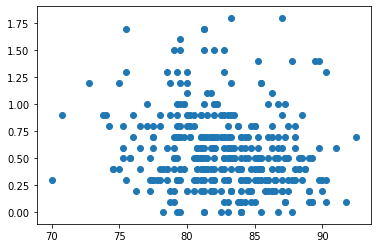

In [241]:
plt.scatter("Wingspan", "SPG", data = cc)
plt.show()

In [247]:
from sklearn import linear_model
lm_model = linear_model.LinearRegression()
X = cc["Wingspan"]
X = X.values.reshape([347,1])
y = cc["SP48"]

In [248]:
lm_model.fit(X,y)
print(lm_model)
print(lm_model.coef_)
print(lm_model.intercept_)
lm_yhat = lm_model.predict(X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[-0.02403289]
3.4963727570753553


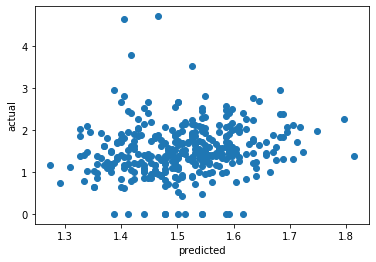

In [249]:
plt.plot(lm_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

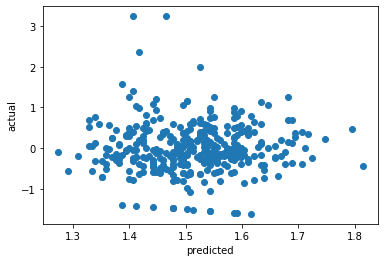

In [250]:
residuals = y - lm_yhat
plt.plot(lm_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [251]:
lm_model.score(X, y)

0.021598520884844374

We will now drop the rows related to Sprint and Agility where there are many missing values.

In [92]:
cc[cc["Sprint"].isna()]
cc_no_sa = cc[cc["Sprint"].notnull()]
cc_no_sa = cc_no_sa[cc["Agility"].notnull()]

C:\Users\Faith\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
cc_no_sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, A.J. Price to Zhou Qi
Data columns (total 47 columns):
Pk                          294 non-null float64
Height (No Shoes)           294 non-null float64
Height (With Shoes)         294 non-null float64
Wingspan                    294 non-null float64
Standing reach              294 non-null float64
Vertical (Max)              293 non-null float64
Vertical (Max Reach)        293 non-null float64
Vertical (No Step)          294 non-null float64
Vertical (No Step Reach)    294 non-null float64
Weight                      294 non-null float64
Body Fat                    294 non-null float64
Hand (Length)               260 non-null float64
Hand (Width)                258 non-null float64
Bench                       185 non-null float64
Agility                     294 non-null float64
Sprint                      294 non-null float64
Rk                          294 non-null int64
Year                        294 non-null int64
Tm       

We will have to turn the pos_new variable, a categorical variable describing what position a person plays, into a numerical variable.

In [199]:
from sklearn.preprocessing import OneHotEncoder

In [200]:
enc = OneHotEncoder(sparse = False)

In [201]:
enc.fit_transform(cc_no_sa[["Pos_new"]])

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [202]:
enc.categories_

[array(['C', 'C-F', 'F', 'G', 'G-F'], dtype=object)]

In [205]:
pos_transform = pd.DataFrame(enc.fit_transform(cc_no_sa[["Pos_new"]]), columns = enc.categories_)
pos_transform.head()
pos_transform.index = cc_no_sa.index
pos_transform.columns = ["C","C-F","F","G","G-F"]
pos_transform.columns

Index(['C', 'C-F', 'F', 'G', 'G-F'], dtype='object')

In [204]:
lm_model = linear_model.LinearRegression()
X = cc_no_sa[["Sprint","Agility","Wingpspan","C","C-F","F","G","G-F"]]
y = cc_no_sa[["BPG"]]

KeyError: "['F', 'G-F', 'Wingpspan', 'C', 'C-F'] not in index"

In [100]:
lm_model.fit(pos_transform,y)
print(lm_model.coef_)
print(lm_model.intercept_)
lm_yhat = lm_model.predict(pos_transform)

[[ 0.29078339  0.20920444 -0.07899781 -0.27686113 -0.14412889]]
[0.44079556]


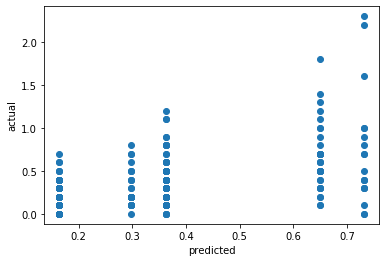

In [101]:
plt.plot(lm_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

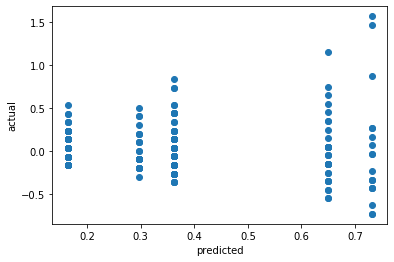

In [102]:
residuals = y - lm_yhat
plt.plot(lm_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [103]:
lm_model.score(pos_transform, y)

0.3066399079858245

In [104]:
# Add pos_transform to a new dataframe called cc_new
# Need to drop values for sprint and agility
# See if wingspan is necessary or not
# Consider using pk_range?

In [105]:
pos_transform.index = cc_no_sa.index
pos_transform.columns = ["C","C-F","F","G","G-F"]
pos_transform.columns

Index(['C', 'C-F', 'F', 'G', 'G-F'], dtype='object')

In [106]:
cc_no_sa_pos = pd.concat([cc_no_sa, pos_transform], axis = 1)
cc_no_sa_pos.head()

,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48,Pos_new,pk_range,Career Length,Career Length Group,C,C-F,F,G,G-F
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Price,52.0,72.50,74.00,75.75,97.0,31.0,128.0,26.0,123.0,193.0,12.4,NaN,NaN,11.0,10.99,3.22,272,2009,IND,22.267,G,us,UConn,2010.0,2015.0,261.0,15.1,5.8,1.4,2.2,0.5,0.0,0.380,0.439,0.316,0.742,4.7,0.058,18.437086,4.450331,6.993377,1.589404,0.000000,G,51-60,5.0,2-5 years,0.0,0.0,0.0,1.0,0.0
Aaron Gordon,4.0,79.50,80.75,83.75,105.0,39.0,144.0,32.5,137.5,220.0,5.1,8.75,10.50,NaN,10.81,3.27,153,2014,ORL,18.288,F,us,Arizona,2015.0,2020.0,347.0,27.9,12.4,6.2,2.2,0.8,0.6,0.450,0.511,0.321,0.705,18.5,0.092,21.333333,10.666667,3.784946,1.376344,1.032258,F,1-10,5.0,2-5 years,0.0,0.0,1.0,0.0,0.0
Al-Farouq Aminu,8.0,79.25,80.50,87.25,108.5,33.5,142.0,27.0,135.5,216.0,8.2,9.50,9.50,13.0,11.29,3.30,214,2010,LAC,19.281,F,us,Wake Forest,2011.0,2020.0,676.0,25.2,7.7,6.1,1.2,1.0,0.6,0.422,0.468,0.338,0.745,27.5,0.078,14.666667,11.619048,2.285714,1.904762,1.142857,F,1-10,9.0,8-10 years,0.0,0.0,1.0,0.0,0.0
Alec Burks,12.0,77.00,78.00,82.00,103.5,36.0,139.5,29.0,132.5,193.0,5.1,9.00,8.25,5.0,10.96,3.17,246,2011,UTA,19.343,G,us,Colorado,2012.0,2020.0,432.0,21.1,9.5,3.0,1.7,0.6,0.2,0.423,0.444,0.357,0.771,13.0,0.068,21.611374,6.824645,3.867299,1.364929,0.454976,G,11-20,8.0,5-8 years,0.0,0.0,0.0,1.0,0.0
Allen Crabbe,31.0,77.25,78.25,83.25,103.5,36.0,139.5,30.5,134.0,197.0,4.7,8.25,8.50,10.0,10.67,3.32,218,2013,CLE,21.084,G-F,us,Cal,2014.0,2019.0,344.0,24.6,9.5,2.9,1.2,0.6,0.3,0.429,0.472,0.393,0.835,13.8,0.078,18.536585,5.658537,2.341463,1.170732,0.585366,G-F,21-30,5.0,2-5 years,0.0,0.0,0.0,0.0,1.0


We want to investigate how sprint, agility, wingspan, and position might affect steals per game. We will first do this using multiple linear regression.

In [216]:
#X = cc_no_sa_pos[["Wingspan","Sprint","Agility","C","C-F","F","G","G-F"]]
X = cc_no_sa_pos[["Wingspan","C","C-F","F","G","G-F"]]
y = cc_no_sa_pos[["SPG"]]

In [217]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[ 0.00299031 -0.09192182 -0.06525807 -0.05693768  0.00119095  0.1352155
   0.07890208]]
[-0.01110515]


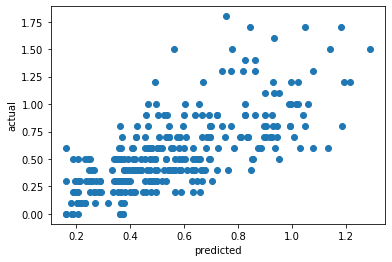

In [218]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

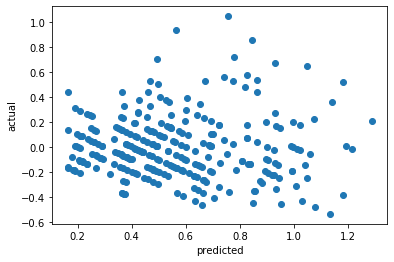

In [219]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [220]:
mlr_model.score(X, y)

0.5080081399314269

In [112]:
enc = OneHotEncoder(sparse = False)

In [113]:
enc.fit_transform(cc[["Pos_new"]])

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [114]:
enc.categories_

[array(['C', 'C-F', 'F', 'G', 'G-F'], dtype=object)]

In [115]:
pos_transform = pd.DataFrame(enc.fit_transform(cc[["Pos_new"]]), columns = enc.categories_)
pos_transform.head()

,C,C-F,F,G,G-F
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [116]:
pos_transform.index = cc.index
pos_transform.columns = ["C","C-F","F","G","G-F"]
pos_transform.columns

Index(['C', 'C-F', 'F', 'G', 'G-F'], dtype='object')

In [117]:
cc_pos = pd.concat([cc, pos_transform], axis = 1)
cc_pos.head()

,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48,Pos_new,pk_range,Career Length,Career Length Group,C,C-F,F,G,G-F
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Price,52.0,72.50,74.00,75.75,97.0,31.0,128.0,26.0,123.0,193.0,12.4,NaN,NaN,11.0,10.99,3.22,272,2009,IND,22.267,G,us,UConn,2010.0,2015.0,261.0,15.1,5.8,1.4,2.2,0.5,0.0,0.380,0.439,0.316,0.742,4.7,0.058,18.437086,4.450331,6.993377,1.589404,0.000000,G,51-60,5.0,2-5 years,0.0,0.0,0.0,1.0,0.0
Aaron Gordon,4.0,79.50,80.75,83.75,105.0,39.0,144.0,32.5,137.5,220.0,5.1,8.75,10.50,NaN,10.81,3.27,153,2014,ORL,18.288,F,us,Arizona,2015.0,2020.0,347.0,27.9,12.4,6.2,2.2,0.8,0.6,0.450,0.511,0.321,0.705,18.5,0.092,21.333333,10.666667,3.784946,1.376344,1.032258,F,1-10,5.0,2-5 years,0.0,0.0,1.0,0.0,0.0
Adreian Payne,15.0,81.00,81.75,88.00,109.0,NaN,NaN,NaN,NaN,239.0,7.6,9.25,9.50,NaN,NaN,NaN,447,2014,ATL,23.133,F-C,us,Michigan State,2015.0,2018.0,107.0,13.1,4.0,2.9,0.6,0.4,0.3,0.406,0.430,0.254,0.680,-0.6,-0.019,14.656489,10.625954,2.198473,1.465649,1.099237,C-F,11-20,3.0,2-5 years,0.0,1.0,0.0,0.0,0.0
Al-Farouq Aminu,8.0,79.25,80.50,87.25,108.5,33.5,142.0,27.0,135.5,216.0,8.2,9.50,9.50,13.0,11.29,3.30,214,2010,LAC,19.281,F,us,Wake Forest,2011.0,2020.0,676.0,25.2,7.7,6.1,1.2,1.0,0.6,0.422,0.468,0.338,0.745,27.5,0.078,14.666667,11.619048,2.285714,1.904762,1.142857,F,1-10,9.0,8-10 years,0.0,0.0,1.0,0.0,0.0
Alec Burks,12.0,77.00,78.00,82.00,103.5,36.0,139.5,29.0,132.5,193.0,5.1,9.00,8.25,5.0,10.96,3.17,246,2011,UTA,19.343,G,us,Colorado,2012.0,2020.0,432.0,21.1,9.5,3.0,1.7,0.6,0.2,0.423,0.444,0.357,0.771,13.0,0.068,21.611374,6.824645,3.867299,1.364929,0.454976,G,11-20,8.0,5-8 years,0.0,0.0,0.0,1.0,0.0


In [193]:
X = cc_pos[["Wingspan","C","C-F","F","G","G-F"]]
y = cc_pos[["SPG"]]
# SPG has 0.50.
# BPG has 0.52 but has fan-shaped residuals.

In [194]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[ 0.00510907 -0.12453145 -0.04927614 -0.05625812  0.0012444   0.14213845
   0.08792726]]
[-0.18461569]


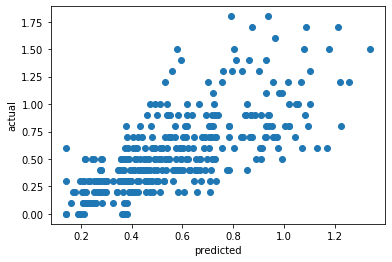

In [195]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

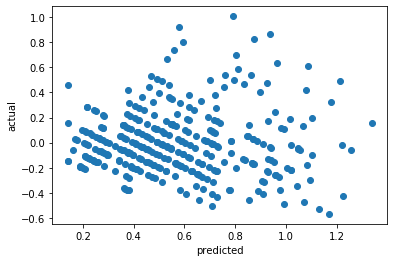

In [196]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

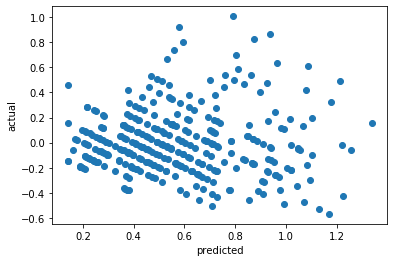

In [197]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [198]:
mlr_model.score(X, y)

0.502377095920065

In [257]:
X = cc_pos[["Wingspan","C","C-F","F","G","G-F"]]
y = cc_pos[["SPG"]]
#y = cc_pos[["SP48"]]

In [258]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[ 0.00510907 -0.12453145 -0.04927614 -0.05625812  0.0012444   0.14213845
   0.08792726]]
[-0.18461569]


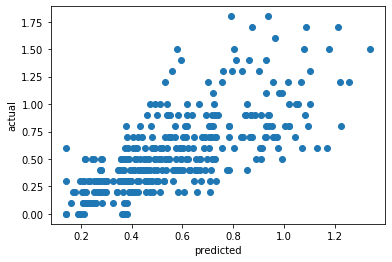

In [259]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

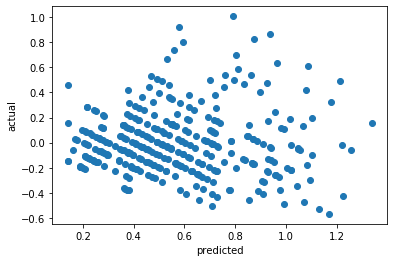

In [260]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [261]:
mlr_model.score(X, y)

0.502377095920065

In [ ]:
## See if any of the vertical measurements contribute to SPG or BPG.

In [ ]:
# Now try polynomial regression

In [145]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#from sklearn import linear_model

In [146]:
X = cc[["Wingspan"]]
y = cc[["SPG"]]

In [147]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X2 = poly.fit_transform(X)

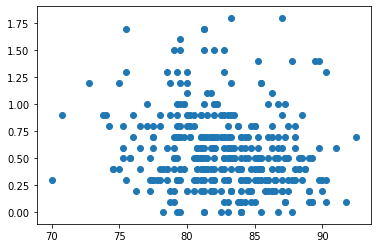

In [157]:
model = linear_model.LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(X,y)
plt.show()

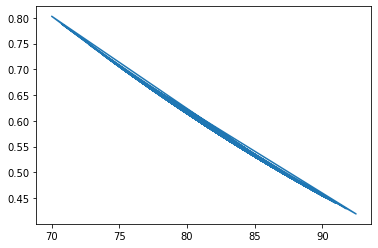

In [158]:
plt.plot(X,yfit)
plt.show()

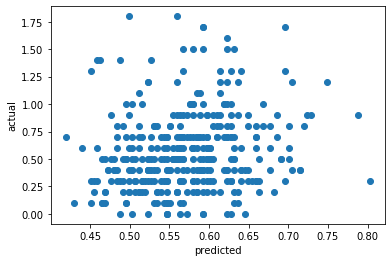

In [159]:
plt.plot(yfit, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

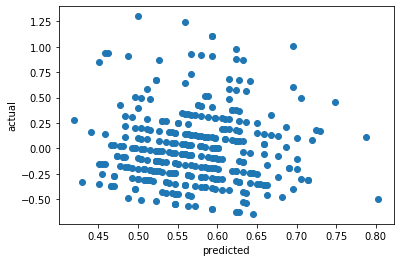

In [160]:
residuals = y - yfit
plt.plot(yfit, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [161]:
model.score(X2, y)

0.03207839799204515

In [232]:
enc = OneHotEncoder(sparse = False)

In [233]:
enc.fit_transform(cc[["Pos_new"]])

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [234]:
enc.categories_

[array(['C', 'C-F', 'F', 'G', 'G-F'], dtype=object)]

In [235]:
pos_transform = pd.DataFrame(enc.fit_transform(cc_no_vert[["Pos_new"]]), columns = enc.categories_)
pos_transform.head()

,C,C-F,F,G,G-F
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [236]:
pos_transform.index = cc_no_vert.index
pos_transform.columns = ["C","C-F","F","G","G-F"]
pos_transform.columns

Index(['C', 'C-F', 'F', 'G', 'G-F'], dtype='object')

In [237]:
cc_no_vert_pos = pd.concat([cc_no_vert, pos_transform], axis = 1)
cc_no_vert_pos.head()

,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48,Pos_new,pk_range,Career Length,Career Length Group,C,C-F,F,G,G-F
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Price,52.0,72.50,74.00,75.75,97.0,31.0,128.0,26.0,123.0,193.0,12.4,NaN,NaN,11.0,10.99,3.22,272,2009,IND,22.267,G,us,UConn,2010.0,2015.0,261.0,15.1,5.8,1.4,2.2,0.5,0.0,0.380,0.439,0.316,0.742,4.7,0.058,18.437086,4.450331,6.993377,1.589404,0.000000,G,51-60,5.0,2-5 years,0.0,0.0,0.0,1.0,0.0
Aaron Gordon,4.0,79.50,80.75,83.75,105.0,39.0,144.0,32.5,137.5,220.0,5.1,8.75,10.50,NaN,10.81,3.27,153,2014,ORL,18.288,F,us,Arizona,2015.0,2020.0,347.0,27.9,12.4,6.2,2.2,0.8,0.6,0.450,0.511,0.321,0.705,18.5,0.092,21.333333,10.666667,3.784946,1.376344,1.032258,F,1-10,5.0,2-5 years,0.0,0.0,1.0,0.0,0.0
Al-Farouq Aminu,8.0,79.25,80.50,87.25,108.5,33.5,142.0,27.0,135.5,216.0,8.2,9.50,9.50,13.0,11.29,3.30,214,2010,LAC,19.281,F,us,Wake Forest,2011.0,2020.0,676.0,25.2,7.7,6.1,1.2,1.0,0.6,0.422,0.468,0.338,0.745,27.5,0.078,14.666667,11.619048,2.285714,1.904762,1.142857,F,1-10,9.0,8-10 years,0.0,0.0,1.0,0.0,0.0
Alec Burks,12.0,77.00,78.00,82.00,103.5,36.0,139.5,29.0,132.5,193.0,5.1,9.00,8.25,5.0,10.96,3.17,246,2011,UTA,19.343,G,us,Colorado,2012.0,2020.0,432.0,21.1,9.5,3.0,1.7,0.6,0.2,0.423,0.444,0.357,0.771,13.0,0.068,21.611374,6.824645,3.867299,1.364929,0.454976,G,11-20,8.0,5-8 years,0.0,0.0,0.0,1.0,0.0
Allen Crabbe,31.0,77.25,78.25,83.25,103.5,36.0,139.5,30.5,134.0,197.0,4.7,8.25,8.50,10.0,10.67,3.32,218,2013,CLE,21.084,G-F,us,Cal,2014.0,2019.0,344.0,24.6,9.5,2.9,1.2,0.6,0.3,0.429,0.472,0.393,0.835,13.8,0.078,18.536585,5.658537,2.341463,1.170732,0.585366,G-F,21-30,5.0,2-5 years,0.0,0.0,0.0,0.0,1.0


In [281]:
X = cc_no_vert_pos[["Wingspan","C","C-F","F","G","G-F","Standing reach"]]
# "Vertical (No Step Reach)"
# Vertical (No Step Reach) improves it by like one percent
y = cc_no_vert_pos[["SPG"]]
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[ 0.0197708  -0.04827862 -0.05199154 -0.04982531  0.00119802  0.08653584
   0.06355963 -0.02048314]]
[0.73152491]


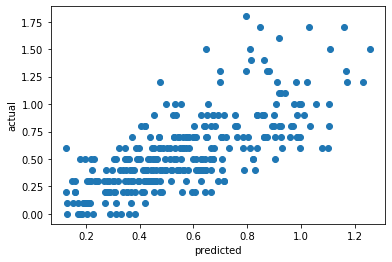

In [282]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

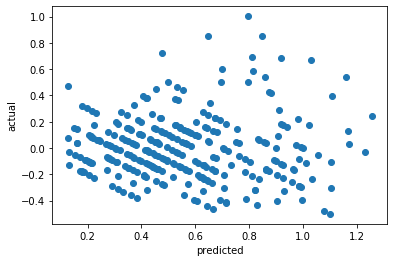

In [283]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [284]:
mlr_model.score(X, y)

0.520391981051509

In [ ]:
#enc = OneHotEncoder(sparse = False)
#enc.fit_transform(cc[["Pos_new"]])
#enc.categories_
#pos_transform = pd.DataFrame(enc.fit_transform(cc[["Pos_new"]]), columns = enc.categories_)
#pos_transform.head()
#pos_transform.index = cc.index
#pos_transform.columns = ["C","C-F","F","G","G-F"]
#pos_transform.columns
#cc_pos = pd.concat([cc_no_vert, pos_transform], axis = 1)
#cc_pos.head()

In [321]:
#X = cc_pos[["C","C-F","F","G","G-F"]]
#y = cc_pos[["PPG"]]
X = cc_no_vert_pos[["C","C-F","F","G","G-F","Vertical (Max)"]]
y = cc_no_vert_pos[["PPG"]]
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[-0.07599761 -0.51119907 -0.43709302  0.01730172  0.75991209  0.26437762
   0.10725812]]
[-1.24275975]


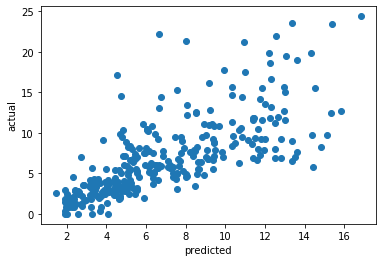

In [322]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

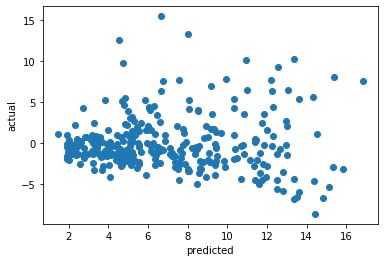

In [323]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [324]:
mlr_model.score(X, y)

0.5313275366800829

In [350]:
X = cc_pos[["C","C-F","F","G","G-F","Standing reach","Wingspan"]]
y = cc_pos[["RPG"]]
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[ 0.48897384  0.71118846 -0.08011639  0.0063739  -0.53182194 -0.58822398
  -0.00545765  0.15201413]]
[-10.2961773]


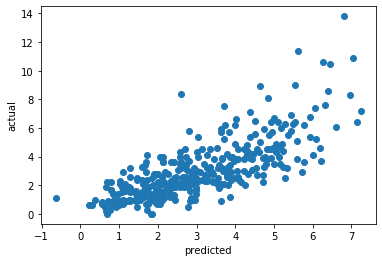

In [351]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

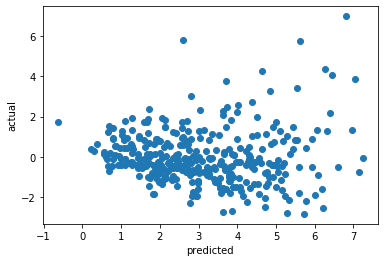

In [353]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [354]:
mlr_model.score(X, y)

0.5750971653746999

In [ ]:
# Without position, it's 18%

In [367]:
X = cc_no_vert_pos[["C","C-F","F","G","G-F","Standing reach","Wingspan","Vertical (Max)","Vertical (No Step Reach)"]]
y = cc_no_vert_pos[["RPG"]]
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[ 0.78486327  0.49143588 -0.11315828  0.00632894 -0.50104966 -0.66209122
   0.05788362  0.14557599  0.08434408 -0.01890401]]
[-16.77742858]


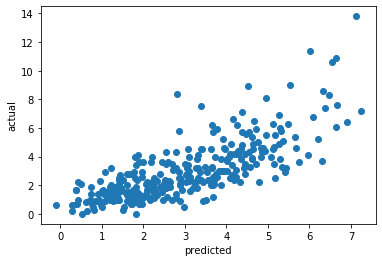

In [368]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

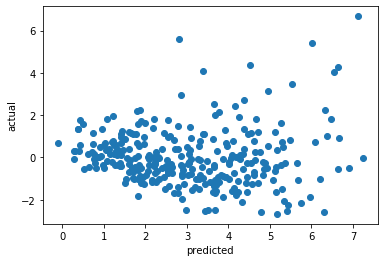

In [369]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [372]:
mlr_model.score(X, y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [410]:
X = cc_no_vert_pos[["C","C-F","F","G","G-F","Standing reach","Weight","Height (No Shoes)"]]
y = cc_no_vert_pos[["APG"]]
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[ 0.00652377  0.0311791  -0.22902736  0.00372548  0.39765418 -0.20632969
  -0.01987601 -0.00067929 -0.11837076]]
[11.88625322]


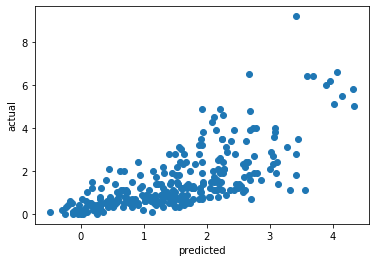

In [411]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

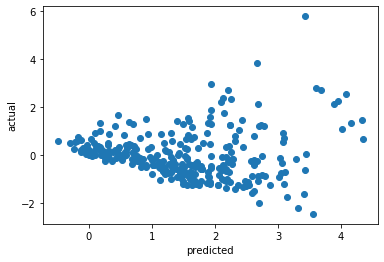

In [412]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [413]:
mlr_model.score(X, y)

0.5105812561574354

In [466]:
guards = cc_no_vert[cc_no_vert["Pos_new"] == "G"]
X = guards[["Wingspan"]]
y = guards[["BPG"]]
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X,y)
print(mlr_model.coef_)
print(mlr_model.intercept_)
mlr_yhat = mlr_model.predict(X)

[[0.01712749]]
[-1.19437901]


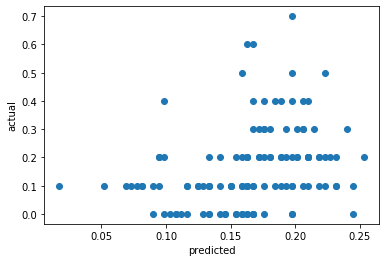

In [467]:
plt.plot(mlr_yhat, y, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

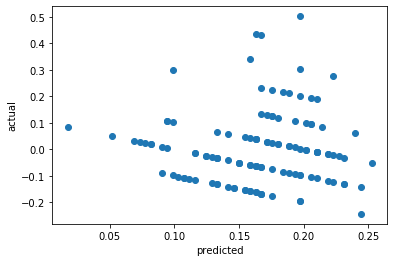

In [468]:
residuals = y - mlr_yhat
plt.plot(mlr_yhat, residuals, 'o')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [469]:
mlr_model.score(X, y)

0.09822902346540295